# Initialization

In [1]:
## Import Libraries and Dependencies ##
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd
import numpy as np

import random

# Dataset Preparation

## Tweets data

In [2]:
# Path for raw tweets input data
DATA_PATH = "D:/OneDrive - National University of Singapore/NUS MTech KE/MTech KE - FYP - InsureSense/Kang Jiang/Phase 3/System Implementation/scripts/Data Mining & Machine Learning/dataset/disaster_phase_text_classification/self/"

In [3]:
df = pd.read_excel(DATA_PATH + 'phase_labelled.xlsx', index_col=0).reset_index(drop=True)

In [4]:
df = df[['processed_text','category_flag']]

In [5]:
# Extract processed text and disaster label
df = df.rename(columns={'processed_text': 'text', 'category_flag': 'label'})

In [6]:
trainDF = df

In [7]:
# remove blank text
trainDF = trainDF.dropna()

# Train Test Split (0.7 vs 0.3)

In [8]:
# split the dataset into training and testing se with 0.7 vs 0.3 proportion
train_x, test_x, train_y, test_y = model_selection.train_test_split(trainDF['text'], trainDF['label'], test_size=0.30, random_state=123)

In [9]:
# # label and encode the target variable 
# encoder = preprocessing.LabelEncoder()
# train_y = encoder.fit_transform(train_y)
# test_y = encoder.fit_transform(test_y)

# Feature Engineering

## Count Vectors as features

Count Vector is a matrix notation of the dataset in which every row represents a tweet from the dataset, every column represents a term from the dataset, and every cell represents the frequency count of a particular term in a particular tweet

In [10]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(trainDF['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)

## TF-IDF Vectors as features

This matrix representing tf-idf scores of every term in different tweet

In [12]:
# derive the word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams in different tweet minimum 2 words-grams and maximum 3 words-gram

In [13]:
# derive the ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(test_x)

This matrix representing tf-idf scores of character level n-grams in the tweet

In [14]:
# derive the characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(test_x) 

# Model Building

## Naive Bayes

In [15]:
# Naive Bayes on Count Vectors
classifier_1 = naive_bayes.MultinomialNB()
classifier_1.fit(xtrain_count, train_y)
predictions_1 = classifier_1.predict(xtest_count)
metrics.accuracy_score(predictions_1, test_y)

0.82913165266106448

In [16]:
df_predict_1 = pd.DataFrame(predictions_1).rename(columns={0: 'predict_1'})

In [17]:
# Naive Bayes on Word Level TF IDF Vectors
classifier_2 = naive_bayes.MultinomialNB()
classifier_2.fit(xtrain_tfidf, train_y)
predictions_2 = classifier_2.predict(xtest_tfidf)
metrics.accuracy_score(predictions_2, test_y)

0.8263305322128851

In [18]:
df_predict_2 = pd.DataFrame(predictions_2).rename(columns={0: 'predict_2'})

In [19]:
# Naive Bayes on Ngram Level TF IDF Vectors
classifier_3 = naive_bayes.MultinomialNB()
classifier_3.fit(xtrain_tfidf_ngram, train_y)
predictions_3 = classifier_3.predict(xtest_tfidf_ngram)
metrics.accuracy_score(predictions_3, test_y)

0.67787114845938379

In [20]:
df_predict_3 = pd.DataFrame(predictions_3).rename(columns={0: 'predict_3'})

In [21]:
# Naive Bayes on Character Level TF IDF Vectors
classifier_4 = naive_bayes.MultinomialNB()
classifier_4.fit(xtrain_tfidf_ngram_chars, train_y)
predictions_4 = classifier_4.predict(xtest_tfidf_ngram_chars)
metrics.accuracy_score(predictions_4, test_y)

0.81792717086834732

In [22]:
df_predict_4 = pd.DataFrame(predictions_4).rename(columns={0: 'predict_4'})

## Linear Regression

In [23]:
# Linear Classifier on Count Vectors
classifier_5 = linear_model.LogisticRegression()
classifier_5.fit(xtrain_count, train_y)
predictions_5 = classifier_5.predict(xtest_count)
metrics.accuracy_score(predictions_5, test_y)

0.77871148459383754

In [24]:
df_predict_5 = pd.DataFrame(predictions_5).rename(columns={0: 'predict_5'})

In [25]:
# Linear Classifier on Word Level TF IDF Vectors
classifier_6 = linear_model.LogisticRegression()
classifier_6.fit(xtrain_tfidf, train_y)
predictions_6 = classifier_6.predict(xtest_tfidf)
metrics.accuracy_score(predictions_6, test_y)

0.80112044817927175

In [26]:
df_predict_6 = pd.DataFrame(predictions_6).rename(columns={0: 'predict_6'})

In [27]:
# Linear Classifier on Ngram Level TF IDF Vectors
classifier_7 = linear_model.LogisticRegression()
classifier_7.fit(xtrain_tfidf_ngram, train_y)
predictions_7 = classifier_7.predict(xtest_tfidf_ngram)
metrics.accuracy_score(predictions_7, test_y)

0.64985994397759106

In [28]:
df_predict_7 = pd.DataFrame(predictions_7).rename(columns={0: 'predict_7'})

In [29]:
# Linear Classifier on Character Level TF IDF Vectors
classifier_8 = linear_model.LogisticRegression()
classifier_8.fit(xtrain_tfidf_ngram_chars, train_y)
predictions_8 = classifier_8.predict(xtest_tfidf_ngram_chars)
metrics.accuracy_score(predictions_8, test_y)

0.82913165266106448

In [30]:
df_predict_8 = pd.DataFrame(predictions_8).rename(columns={0: 'predict_8'})

## Random Forest

In [31]:
# Random Forest on Count Vectors
classifier_9 = ensemble.RandomForestClassifier()
classifier_9.fit(xtrain_count, train_y)
predictions_9 = classifier_9.predict(xtest_count)
metrics.accuracy_score(predictions_9, test_y)

0.74509803921568629

In [32]:
df_predict_9 = pd.DataFrame(predictions_9).rename(columns={0: 'predict_9'})

In [33]:
# Random Forest on Word Level TF IDF Vectors
classifier_10 = ensemble.RandomForestClassifier()
classifier_10.fit(xtrain_tfidf, train_y)
predictions_10 = classifier_10.predict(xtest_tfidf)
metrics.accuracy_score(predictions_10, test_y)

0.69467787114845936

In [34]:
df_predict_10 = pd.DataFrame(predictions_10).rename(columns={0: 'predict_10'})

In [35]:
# Random Forest on Character Level TF IDF Vectors
classifier_11 = ensemble.RandomForestClassifier()
classifier_11.fit(xtrain_tfidf_ngram_chars, train_y)
predictions_11 = classifier_11.predict(xtest_tfidf_ngram_chars)
metrics.accuracy_score(predictions_11, test_y)

0.72549019607843135

In [36]:
df_predict_11 = pd.DataFrame(predictions_11).rename(columns={0: 'predict_11'})

## Ensemble Models

In [37]:
frames = [df_predict_1, df_predict_2, df_predict_4, df_predict_6, df_predict_7]

In [38]:
df_predict_ensemble = pd.concat(frames, axis=1)
df_predict_ensemble['predict_ensemble']  = ""
col = df_predict_ensemble.loc[: , :]
df_predict_ensemble['predict_ensemble'] = col.mode(axis=1)
df_predict_ensemble['predict_ensemble'] = df_predict_ensemble['predict_ensemble'].astype('int')
df_predict_ensemble['predict_final'] = df_predict_ensemble['predict_ensemble'] 

In [39]:
df_predict_ensemble.head()

,predict_1,predict_2,predict_4,predict_6,predict_7,predict_ensemble,predict_final
0,1,1,1,1,4,1,1
1,4,4,4,4,4,4,4
2,2,2,2,2,4,2,2
3,3,3,3,3,3,3,3
4,1,1,4,1,1,1,1


In [40]:
predictions_final = df_predict_ensemble['predict_final'].values

In [41]:
metrics.accuracy_score(predictions_final, test_y)

0.82352941176470584

# Model Validation

In [42]:
# import libraries for performance validation  
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot Confusion Matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


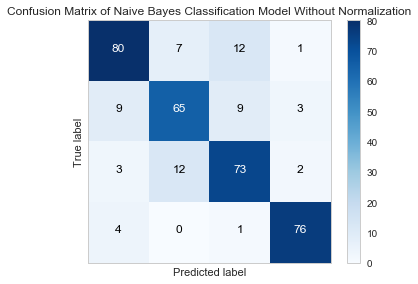

In [43]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(test_y, predictions_final)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Naive Bayes Classification Model Without Normalization')
plt.figure()
plt.show()

In [44]:
print(classification_report(test_y, predictions_final))

             precision    recall  f1-score   support

          1       0.83      0.80      0.82       100
          2       0.77      0.76      0.76        86
          3       0.77      0.81      0.79        90
          4       0.93      0.94      0.93        81

avg / total       0.82      0.82      0.82       357



# Diasaster Phase Tweets Classification

In [45]:
INPUT_PATH = ("D:/OneDrive - National University of Singapore/NUS MTech KE/MTech KE - FYP - InsureSense/Kang Jiang/Phase 3/System Implementation/scripts/Data Mining & Machine Learning/dataset/disaster_text_classification/model/")

In [46]:
OUTPUT_PATH = ("D:/OneDrive - National University of Singapore/NUS MTech KE/MTech KE - FYP - InsureSense/Kang Jiang/Phase 3/System Implementation/scripts/Data Mining & Machine Learning/dataset/disaster_phase_text_classification/model/")

## Japan Floods

In [47]:
## Data Processing ##
df_Japan_floods = pd.read_csv(INPUT_PATH + 'df_Japan_floods_disaster_labelled.csv', index_col=0, encoding = "ISO-8859-1")

In [48]:
df_Japan_floods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36988 entries, 0 to 36987
Data columns (total 12 columns):
tweet_id          36988 non-null float64
user              36988 non-null object
timestamp         36988 non-null object
date              36988 non-null object
events            36988 non-null object
text              36988 non-null object
processed_text    36988 non-null object
likes             36988 non-null int64
replies           36988 non-null int64
retweets          36988 non-null int64
url               36988 non-null object
disaster_flag     36988 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 3.7+ MB


In [49]:
df_Japan_floods = df_Japan_floods.dropna().reset_index(drop=True)

In [50]:
df_Japan_floods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36988 entries, 0 to 36987
Data columns (total 12 columns):
tweet_id          36988 non-null float64
user              36988 non-null object
timestamp         36988 non-null object
date              36988 non-null object
events            36988 non-null object
text              36988 non-null object
processed_text    36988 non-null object
likes             36988 non-null int64
replies           36988 non-null int64
retweets          36988 non-null int64
url               36988 non-null object
disaster_flag     36988 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 3.4+ MB


In [51]:
df_Japan_floods.head()

,tweet_id,user,timestamp,date,events,text,processed_text,likes,replies,retweets,url,disaster_flag
0,1.005360e+18,@jjwalsh,6/9/2018 7:47,6/9/2018,Japan Floods,Nice day by the river in #Kobe on this beautif...,nice day river kobe beautiful sunny weather sa...,26,3,3,/jjwalsh/status/1005355731665629184,1
1,1.005370e+18,@metalheadbazaar,6/9/2018 8:29,6/9/2018,Japan Floods,Marduk - To Tour Japan In November - Metal Sto...,marduk tour japan november metal storm,0,0,0,/metalheadbazaar/status/1005366203618156546,1
2,1.005370e+18,@wordwidetroll,6/9/2018 8:45,6/9/2018,Japan Floods,Yestarday storm give me http://www.irvinakatec...,yestarday storm give ad adsense money moneygur...,0,0,0,/wordwidetroll/status/1005370364757725184,1
3,1.005370e+18,@kazuotamakashi,6/9/2018 9:00,6/9/2018,Japan Floods,"Rain tomorrow, at Nara City, Japan! With a hig...",rain tomorrow nara city japan high 22c low 18c,0,0,0,/kazuotamakashi/status/1005373968650571778,1
4,1.005370e+18,@shukyudo_travel,6/9/2018 9:00,6/9/2018,Japan Floods,Rain tomorrow! With a high of 79F and a low of...,rain tomorrow high 79f low 70f japan osaka tra...,0,0,0,/shukyudo_travel/status/1005373973142622210,1


In [52]:
Japan_floods_unlabel = pd.Series(df_Japan_floods['processed_text'])

In [53]:
## Feature Engineering ##
Japan_floods_unlabel_count =  count_vect.transform(Japan_floods_unlabel)
Japan_floods_unlabel_tfidf =  tfidf_vect.transform(Japan_floods_unlabel)
Japan_floods_unlabel_tfidf_ngram =  tfidf_vect_ngram.transform(Japan_floods_unlabel)
Japan_floods_unlabel_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(Japan_floods_unlabel) 

In [54]:
## Classify disaster phase ##
df_Japan_floods_predictions_1 = classifier_1.predict(Japan_floods_unlabel_count)
df_Japan_floods_predictions_2 = classifier_2.predict(Japan_floods_unlabel_tfidf)
df_Japan_floods_predictions_3 = classifier_3.predict(Japan_floods_unlabel_tfidf_ngram)
df_Japan_floods_predictions_4 = classifier_4.predict(Japan_floods_unlabel_tfidf_ngram_chars)
df_Japan_floods_predictions_5 = classifier_5.predict(Japan_floods_unlabel_count)
df_Japan_floods_predictions_6 = classifier_6.predict(Japan_floods_unlabel_tfidf)
df_Japan_floods_predictions_7 = classifier_7.predict(Japan_floods_unlabel_tfidf_ngram)
df_Japan_floods_predictions_8 = classifier_8.predict(Japan_floods_unlabel_tfidf_ngram_chars)
df_Japan_floods_predictions_9 = classifier_9.predict(Japan_floods_unlabel_count)
df_Japan_floods_predictions_10 = classifier_10.predict(Japan_floods_unlabel_tfidf)
df_Japan_floods_predictions_11 = classifier_11.predict(Japan_floods_unlabel_tfidf_ngram_chars)

In [55]:
df_predict_1 = pd.DataFrame(df_Japan_floods_predictions_1).rename(columns={0: 'predict_1'})
df_predict_2 = pd.DataFrame(df_Japan_floods_predictions_2).rename(columns={0: 'predict_2'})
df_predict_3 = pd.DataFrame(df_Japan_floods_predictions_3).rename(columns={0: 'predict_3'})
df_predict_4 = pd.DataFrame(df_Japan_floods_predictions_4).rename(columns={0: 'predict_4'})
df_predict_5 = pd.DataFrame(df_Japan_floods_predictions_5).rename(columns={0: 'predict_5'})
df_predict_6 = pd.DataFrame(df_Japan_floods_predictions_6).rename(columns={0: 'predict_6'})
df_predict_7 = pd.DataFrame(df_Japan_floods_predictions_7).rename(columns={0: 'predict_7'})
df_predict_8 = pd.DataFrame(df_Japan_floods_predictions_8).rename(columns={0: 'predict_8'})
df_predict_9 = pd.DataFrame(df_Japan_floods_predictions_9).rename(columns={0: 'predict_9'})
df_predict_10 = pd.DataFrame(df_Japan_floods_predictions_10).rename(columns={0: 'predict_10'})
df_predict_11 = pd.DataFrame(df_Japan_floods_predictions_11).rename(columns={0: 'predict_11'})

In [56]:
## Ensemble Model ##
frames = [df_predict_1, df_predict_2, df_predict_4, df_predict_6, df_predict_7]

In [57]:
df_predict_ensemble = pd.concat(frames, axis=1)
df_predict_ensemble['predict_ensemble']  = ""
col = df_predict_ensemble.loc[: , :]
df_predict_ensemble['predict_ensemble'] = col.mode(axis=1)
df_predict_ensemble['predict_ensemble'] = df_predict_ensemble['predict_ensemble'].astype('int')
df_predict_ensemble['predict_final'] = df_predict_ensemble['predict_ensemble'] 

In [58]:
df_predict_ensemble.head()

,predict_1,predict_2,predict_4,predict_6,predict_7,predict_ensemble,predict_final
0,3,3,4,3,3,3,3
1,3,3,1,3,4,3,3
2,3,3,1,3,3,3,3
3,1,1,1,1,4,1,1
4,1,1,2,1,3,1,1


In [59]:
df_predict_ensemble = df_predict_ensemble[['predict_final']]

In [60]:
df_Japan_floods.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36988 entries, 0 to 36987
Data columns (total 12 columns):
tweet_id          36988 non-null float64
user              36988 non-null object
timestamp         36988 non-null object
date              36988 non-null object
events            36988 non-null object
text              36988 non-null object
processed_text    36988 non-null object
likes             36988 non-null int64
replies           36988 non-null int64
retweets          36988 non-null int64
url               36988 non-null object
disaster_flag     36988 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 3.4+ MB


In [61]:
## Join the class label into original dataset ##
df_Japan_floods_labelled = df_Japan_floods.join(df_predict_ensemble, how='outer')
df_Japan_floods_labelled = df_Japan_floods_labelled.rename(columns={'predict_final': 'disaster_phase'})

In [62]:
df_Japan_floods_labelled.head()

,tweet_id,user,timestamp,date,events,text,processed_text,likes,replies,retweets,url,disaster_flag,disaster_phase
0,1.005360e+18,@jjwalsh,6/9/2018 7:47,6/9/2018,Japan Floods,Nice day by the river in #Kobe on this beautif...,nice day river kobe beautiful sunny weather sa...,26,3,3,/jjwalsh/status/1005355731665629184,1,3
1,1.005370e+18,@metalheadbazaar,6/9/2018 8:29,6/9/2018,Japan Floods,Marduk - To Tour Japan In November - Metal Sto...,marduk tour japan november metal storm,0,0,0,/metalheadbazaar/status/1005366203618156546,1,3
2,1.005370e+18,@wordwidetroll,6/9/2018 8:45,6/9/2018,Japan Floods,Yestarday storm give me http://www.irvinakatec...,yestarday storm give ad adsense money moneygur...,0,0,0,/wordwidetroll/status/1005370364757725184,1,3
3,1.005370e+18,@kazuotamakashi,6/9/2018 9:00,6/9/2018,Japan Floods,"Rain tomorrow, at Nara City, Japan! With a hig...",rain tomorrow nara city japan high 22c low 18c,0,0,0,/kazuotamakashi/status/1005373968650571778,1,1
4,1.005370e+18,@shukyudo_travel,6/9/2018 9:00,6/9/2018,Japan Floods,Rain tomorrow! With a high of 79F and a low of...,rain tomorrow high 79f low 70f japan osaka tra...,0,0,0,/shukyudo_travel/status/1005373973142622210,1,1


In [63]:
## Data Storage ##
df_Japan_floods_labelled.to_csv(OUTPUT_PATH + 'df_Japan_floods_phase_labelled.csv')

## Typhoon Jebi

In [64]:
## Data Processing ##
df_Typhoon_Jebi  = pd.read_csv(INPUT_PATH + 'df_Typhoon_Jebi_disaster_labelled.csv', index_col=0)

In [65]:
df_Typhoon_Jebi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47595 entries, 0 to 47594
Data columns (total 12 columns):
tweet_id          47595 non-null int64
user              47595 non-null object
timestamp         47595 non-null object
date              47595 non-null object
events            47595 non-null object
text              47595 non-null object
processed_text    47595 non-null object
likes             47595 non-null int64
replies           47595 non-null int64
retweets          47595 non-null int64
url               47595 non-null object
disaster_flag     47595 non-null int64
dtypes: int64(5), object(7)
memory usage: 4.7+ MB


In [66]:
df_Typhoon_Jebi  = df_Typhoon_Jebi.dropna().reset_index(drop=True)

In [67]:
df_Typhoon_Jebi .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47595 entries, 0 to 47594
Data columns (total 12 columns):
tweet_id          47595 non-null int64
user              47595 non-null object
timestamp         47595 non-null object
date              47595 non-null object
events            47595 non-null object
text              47595 non-null object
processed_text    47595 non-null object
likes             47595 non-null int64
replies           47595 non-null int64
retweets          47595 non-null int64
url               47595 non-null object
disaster_flag     47595 non-null int64
dtypes: int64(5), object(7)
memory usage: 4.4+ MB


In [68]:
Typhoon_Jebi_unlabel  = pd.Series(df_Typhoon_Jebi['processed_text'])

In [69]:
## Feature Engineering ##
Typhoon_Jebi_unlabel_count =  count_vect.transform(Typhoon_Jebi_unlabel)
Typhoon_Jebi_unlabel_tfidf =  tfidf_vect.transform(Typhoon_Jebi_unlabel)
Typhoon_Jebi_unlabel_tfidf_ngram =  tfidf_vect_ngram.transform(Typhoon_Jebi_unlabel)
Typhoon_Jebi_unlabel_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(Typhoon_Jebi_unlabel)

In [70]:
## Classify disaster phase ##
df_Typhoon_Jebi_predictions_1 = classifier_1.predict(Typhoon_Jebi_unlabel_count)
df_Typhoon_Jebi_predictions_2 = classifier_2.predict(Typhoon_Jebi_unlabel_tfidf)
df_Typhoon_Jebi_predictions_3 = classifier_3.predict(Typhoon_Jebi_unlabel_tfidf_ngram)
df_Typhoon_Jebi_predictions_4 = classifier_4.predict(Typhoon_Jebi_unlabel_tfidf_ngram_chars)
df_Typhoon_Jebi_predictions_5 = classifier_5.predict(Typhoon_Jebi_unlabel_count)
df_Typhoon_Jebi_predictions_6 = classifier_6.predict(Typhoon_Jebi_unlabel_tfidf)
df_Typhoon_Jebi_predictions_7 = classifier_7.predict(Typhoon_Jebi_unlabel_tfidf_ngram)
df_Typhoon_Jebi_predictions_8 = classifier_8.predict(Typhoon_Jebi_unlabel_tfidf_ngram_chars)
df_Typhoon_Jebi_predictions_9 = classifier_9.predict(Typhoon_Jebi_unlabel_count)
df_Typhoon_Jebi_predictions_10 = classifier_10.predict(Typhoon_Jebi_unlabel_tfidf)
df_Typhoon_Jebi_predictions_11 = classifier_11.predict(Typhoon_Jebi_unlabel_tfidf_ngram_chars)

In [71]:
df_predict_1 = pd.DataFrame(df_Typhoon_Jebi_predictions_1).rename(columns={0: 'predict_1'})
df_predict_2 = pd.DataFrame(df_Typhoon_Jebi_predictions_2).rename(columns={0: 'predict_2'})
df_predict_3 = pd.DataFrame(df_Typhoon_Jebi_predictions_3).rename(columns={0: 'predict_3'})
df_predict_4 = pd.DataFrame(df_Typhoon_Jebi_predictions_4).rename(columns={0: 'predict_4'})
df_predict_5 = pd.DataFrame(df_Typhoon_Jebi_predictions_5).rename(columns={0: 'predict_5'})
df_predict_6 = pd.DataFrame(df_Typhoon_Jebi_predictions_6).rename(columns={0: 'predict_6'})
df_predict_7 = pd.DataFrame(df_Typhoon_Jebi_predictions_7).rename(columns={0: 'predict_7'})
df_predict_8 = pd.DataFrame(df_Typhoon_Jebi_predictions_8).rename(columns={0: 'predict_8'})
df_predict_9 = pd.DataFrame(df_Typhoon_Jebi_predictions_9).rename(columns={0: 'predict_9'})
df_predict_10 = pd.DataFrame(df_Typhoon_Jebi_predictions_10).rename(columns={0: 'predict_10'})
df_predict_11 = pd.DataFrame(df_Typhoon_Jebi_predictions_11).rename(columns={0: 'predict_11'})

In [72]:
## Ensemble Model ##
frames = [df_predict_1, df_predict_2, df_predict_4, df_predict_6, df_predict_7]

In [73]:
df_predict_ensemble = pd.concat(frames, axis=1)
df_predict_ensemble['predict_ensemble']  = ""
col = df_predict_ensemble.loc[: , :]
df_predict_ensemble['predict_ensemble'] = col.mode(axis=1)
df_predict_ensemble['predict_ensemble'] = df_predict_ensemble['predict_ensemble'].astype('int')
df_predict_ensemble['predict_final'] = df_predict_ensemble['predict_ensemble']

In [74]:
df_predict_ensemble = df_predict_ensemble[['predict_final']]

In [75]:
## Join the class label into original dataset ##
df_Typhoon_Jebi_labelled = df_Typhoon_Jebi.join(df_predict_ensemble, how='outer')
df_Typhoon_Jebi_labelled = df_Typhoon_Jebi_labelled.rename(columns={'predict_final': 'disaster_phase'})

In [76]:
df_Typhoon_Jebi_labelled.head()

,tweet_id,user,timestamp,date,events,text,processed_text,likes,replies,retweets,url,disaster_flag,disaster_phase
0,1022400668013744128,@pedromj,2018-07-26 08:38:09,2018-07-26,Typhoon Jebi,Typhoon Jongdari remains on course to hit Japa...,typhoon jongdari remains course hit japan's ma...,0,0,0,/pedromj/status/1022400668013744128,1,1
1,1022398649526112256,@breakingweather,2018-07-26 08:30:07,2018-07-26,Typhoon Jebi,#Jongdari is nearing typhoon strength in the W...,jongdari nearing typhoon strength west pacific...,25,2,46,/breakingweather/status/1022398649526112256,1,1
2,1022398159580880896,@Somnium410,2018-07-26 08:28:11,2018-07-26,Typhoon Jebi,"Marco, buenas tardes!\r\r\nLike you said, a ty...",marco buenas tardes like said typhoon coming j...,0,0,0,/Somnium410/status/1022398159580880896,1,3
3,1022398059630579712,@SaraFujimura,2018-07-26 08:27:47,2018-07-26,Typhoon Jebi,Aaand a taifu (typhoon) is headed toward Japan...,aaand taifu typhoon headed toward japan much e...,1,1,0,/SaraFujimura/status/1022398059630579712,1,3
4,1022396408190578689,@sasucce,2018-07-26 08:21:13,2018-07-26,Typhoon Jebi,there was all the flooding when i first arrive...,flooding first arrived japan record breaking h...,1,0,0,/sasucce/status/1022396408190578689,1,2


In [77]:
## Data Storage ##
df_Typhoon_Jebi_labelled.to_csv(OUTPUT_PATH + 'df_Typhoon_Jebi_phase_labelled.csv')

## Typhoon Mangkhut

In [78]:
## Data Processing ##
df_Typhoon_Mangkhut = pd.read_csv(INPUT_PATH + 'df_Typhoon_Mangkhut_disaster_labelled.csv', index_col=0)

In [79]:
df_Typhoon_Mangkhut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65164 entries, 0 to 65163
Data columns (total 12 columns):
tweet_id          65164 non-null float64
user              65164 non-null object
timestamp         65164 non-null object
date              65164 non-null object
events            65164 non-null object
text              65164 non-null object
processed_text    65164 non-null object
likes             65164 non-null float64
replies           65164 non-null int64
retweets          65164 non-null int64
url               65164 non-null object
disaster_flag     65164 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 6.5+ MB


In [80]:
df_Typhoon_Mangkhut = df_Typhoon_Mangkhut.dropna().reset_index(drop=True)

In [81]:
df_Typhoon_Mangkhut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65164 entries, 0 to 65163
Data columns (total 12 columns):
tweet_id          65164 non-null float64
user              65164 non-null object
timestamp         65164 non-null object
date              65164 non-null object
events            65164 non-null object
text              65164 non-null object
processed_text    65164 non-null object
likes             65164 non-null float64
replies           65164 non-null int64
retweets          65164 non-null int64
url               65164 non-null object
disaster_flag     65164 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 6.0+ MB


In [82]:
Typhoon_Mangkhut_unlabel = pd.Series(df_Typhoon_Mangkhut['processed_text'])

In [83]:
## Feature Engineering ##
Typhoon_Mangkhut_unlabel_count =  count_vect.transform(Typhoon_Mangkhut_unlabel)
Typhoon_Mangkhut_unlabel_tfidf =  tfidf_vect.transform(Typhoon_Mangkhut_unlabel)
Typhoon_Mangkhut_unlabel_tfidf_ngram =  tfidf_vect_ngram.transform(Typhoon_Mangkhut_unlabel)
Typhoon_Mangkhut_unlabel_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(Typhoon_Mangkhut_unlabel)

In [84]:
## Classify disaster phase ##
df_Typhoon_Mangkhut_predictions_1 = classifier_1.predict(Typhoon_Mangkhut_unlabel_count)
df_Typhoon_Mangkhut_predictions_2 = classifier_2.predict(Typhoon_Mangkhut_unlabel_tfidf)
df_Typhoon_Mangkhut_predictions_3 = classifier_3.predict(Typhoon_Mangkhut_unlabel_tfidf_ngram)
df_Typhoon_Mangkhut_predictions_4 = classifier_4.predict(Typhoon_Mangkhut_unlabel_tfidf_ngram_chars)
df_Typhoon_Mangkhut_predictions_5 = classifier_5.predict(Typhoon_Mangkhut_unlabel_count)
df_Typhoon_Mangkhut_predictions_6 = classifier_6.predict(Typhoon_Mangkhut_unlabel_tfidf)
df_Typhoon_Mangkhut_predictions_7 = classifier_7.predict(Typhoon_Mangkhut_unlabel_tfidf_ngram)
df_Typhoon_Mangkhut_predictions_8 = classifier_8.predict(Typhoon_Mangkhut_unlabel_tfidf_ngram_chars)
df_Typhoon_Mangkhut_predictions_9 = classifier_9.predict(Typhoon_Mangkhut_unlabel_count)
df_Typhoon_Mangkhut_predictions_10 = classifier_10.predict(Typhoon_Mangkhut_unlabel_tfidf)
df_Typhoon_Mangkhut_predictions_11 = classifier_11.predict(Typhoon_Mangkhut_unlabel_tfidf_ngram_chars)

In [85]:
df_predict_1 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_1).rename(columns={0: 'predict_1'})
df_predict_2 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_2).rename(columns={0: 'predict_2'})
df_predict_3 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_3).rename(columns={0: 'predict_3'})
df_predict_4 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_4).rename(columns={0: 'predict_4'})
df_predict_5 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_5).rename(columns={0: 'predict_5'})
df_predict_6 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_6).rename(columns={0: 'predict_6'})
df_predict_7 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_7).rename(columns={0: 'predict_7'})
df_predict_8 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_8).rename(columns={0: 'predict_8'})
df_predict_9 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_9).rename(columns={0: 'predict_9'})
df_predict_10 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_10).rename(columns={0: 'predict_10'})
df_predict_11 = pd.DataFrame(df_Typhoon_Mangkhut_predictions_11).rename(columns={0: 'predict_11'})

In [86]:
## Ensemble Model ##
frames = [df_predict_1, df_predict_2, df_predict_4, df_predict_6, df_predict_7]

df_predict_ensemble = pd.concat(frames, axis=1)
df_predict_ensemble['predict_ensemble']  = ""
col = df_predict_ensemble.loc[: , :]
df_predict_ensemble['predict_ensemble'] = col.mode(axis=1)
df_predict_ensemble['predict_ensemble'] = df_predict_ensemble['predict_ensemble'].astype('int')
df_predict_ensemble['predict_final'] = df_predict_ensemble['predict_ensemble']

In [87]:
df_predict_ensemble = df_predict_ensemble[['predict_final']]

In [88]:
## Join the class label into original dataset ##
df_Typhoon_Mangkhut_labelled = df_Typhoon_Mangkhut.join(df_predict_ensemble, how='outer')
df_Typhoon_Mangkhut_labelled = df_Typhoon_Mangkhut_labelled.rename(columns={'predict_final': 'disaster_phase'})

In [89]:
df_Typhoon_Mangkhut_labelled.head()

,tweet_id,user,timestamp,date,events,text,processed_text,likes,replies,retweets,url,disaster_flag,disaster_phase
0,1.026975e+18,@Kuwago68,2018-08-07 23:35:23,2018-08-07,Typhoon Mangkhut,Ummm...Well...Ummm...To Late. He'd already mad...,ummm ... well ... ummm ... late he'd already m...,1.0,1,0,/Kuwago68/status/1026975117950107648,1,3
1,1.026712e+18,@catcoco2011,2018-08-07 06:07:53,2018-08-07,Typhoon Mangkhut,@29rain \r\r\n[2018 RAIN JUSTÂ FOR YOU]\r\r\n...,2018 rain hong kong rain fanmeeting hall 11 ra...,6.0,0,3,/catcoco2011/status/1026711509093810176,1,2
2,1.027117e+18,@hongkonginforme,2018-08-08 09:00:01,2018-08-08,Typhoon Mangkhut,Bird in the Rain â€“ Hong KongÂ Picture https:...,bird rain hong kongpicture,0.0,0,0,/hongkonginforme/status/1027117212782473216,1,1
3,1.026987e+18,@CloudThai,2018-08-08 00:22:14,2018-08-08,Typhoon Mangkhut,"D-80\r\r\nRAIN Asian Fan Meeting Tour ""Just Fo...",D-8 0 rain asian fan meeting tour schedule ann...,7.0,0,3,/CloudThai/status/1026986910659489792,1,1
4,1.027045e+18,@rthk_enews,2018-08-08 04:13:40,2018-08-08,Typhoon Mangkhut,The ANA group scraps flights from Narita to Sh...,ana group scrap flight narita shanghai hong ko...,0.0,0,0,/rthk_enews/status/1027045152466989057,1,1


In [90]:
## Data Storage ##
df_Typhoon_Mangkhut_labelled.to_csv(OUTPUT_PATH + 'df_Typhoon_Mangkhut_phase_labelled.csv')